## Data Visulaization

> Use a picture. It’s worth a thousand words.

> <div style="text-align: right">— Arthur Brisbane (1911) </div>

This is about basic visualization capabilities of the <code>matplotlib</code> library.

_Data Visualization_ >
### Two-Dimensional Plotting

To begin with, we have to import the respective libraries. The main plotting functions are found in the sublibrary <code>matplotlib.pyplot</code>:

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

_Data Visualization_ > _Two-Dimensional Plotting_
#### One-Dimensional Data Set

We will plot data stored in <code>NumPy ndarray</code> objects. However, <code>matplotlib</code> is of course able to plot data stored in different <code>Python</code> formats, like list objects, as well.

In [2]:
np.random.seed(1000)
y = np.random.standard_normal(20)
y

array([-0.8044583 ,  0.32093155, -0.02548288,  0.64432383, -0.30079667,
        0.38947455, -0.1074373 , -0.47998308,  0.5950355 , -0.46466753,
        0.66728131, -0.80611561, -1.19606983, -0.40596016, -0.18237734,
        0.10319289, -0.13842199,  0.70569237,  1.27179528, -0.98674733])

The most fundamental plotting function is <code>plot</code> from the <code>pyplot</code> sublibrary. In principle, it needs two sets of numbers:
- **x values**: a list or an array containing the $x$ coordinates (values of the abscissa)
- **y values**: a list or an array containing the $y$ coordinates (values of the ordinate)

Text(0.5,1,'Plot given x and y values')

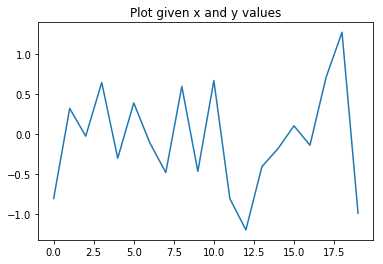

In [3]:
x = range(len(y))
plt.plot(x, y)
plt.title('Plot given x and y values')

<code>plot</code> notices when you pass an <code>ndarray</code> object. In this case, there is no need to provide the “extra” information of the $x$ values. If you only provide the $y$ values, <code>plot</code> takes the index values as the respective $x$ values.

Text(0.5,1,'Plot given data as 1D array')

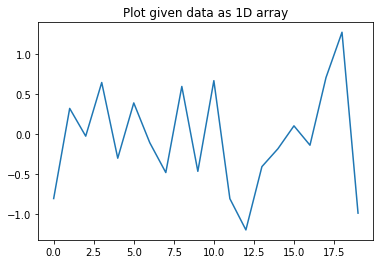

In [4]:
plt.plot(y)
plt.title('Plot given data as 1D array')

> <center>**NUMPY ARRAYS AND MATPLOTLIB**</center>

> You can simply pass <code>NumPy ndarray</code> objects to <code>matplotlib</code> functions. It is able to interpret the data structure for simplified plotting. However, be careful to not pass a too large and/or complex array.

Since the majority of the <code>ndarray</code> methods return again an <code>ndarray</code> object, you can also pass your object with a method (or even multiple methods, in some cases) attached.

Text(0.5,1,'Plot given a 1D array with method attached')

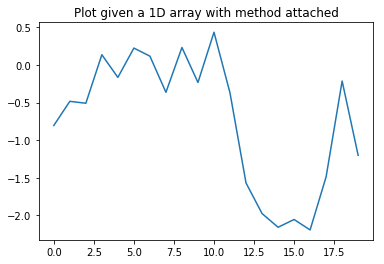

In [5]:
plt.plot(y.cumsum())
plt.title('Plot given a 1D array with method attached')

The default plotting style does not satisfy typical requirements for reports, publications, etc. For example, you might want to customize the font used (e.g., for compatibility with <code>LaTeX</code> fonts), to have labels at the axes, or to plot a grid for better readability. Therefore, <code>matplotlib</code> offers a large number of functions to customize the plotting style.

Text(0.5,1,'Plot with grid and tight axes')

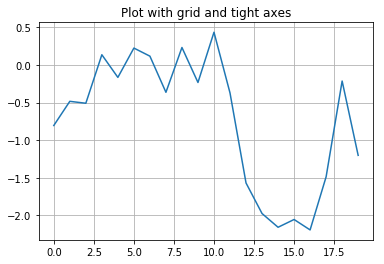

In [6]:
plt.plot(y.cumsum()) 
plt.grid(True) # adds a grid
plt.axis('tight') # adjusts the axis ranges
plt.title('Plot with grid and tight axes')

<center>_Options for <code>plt.axis</code>_</center>

| Parameter   | Description        |
|:-----------:|-------------------|
| Empty | Returns current axis limits | 
| <code>off</code> | Turns axis lines and labels off |
| <code>equal</code> | Leads to equal scaling |
| <code>scaled</code> | Equal scaling via dimension changes |
| <code>tight</code> | Makes all data visible (tightens limits) |
| <code>image</code> | Makes all data visible (with data limits) |
| <code>[xmin, xmax, ymin, ymax]</code> | Sets limits to given (<code>list</code> of) values |

You can directly set the minimum and maximum values of each axis by using <code>plt.xlim</code> and <code>plt.ylim</code>. 

Text(0.5,1,'Plot with custom axis limits')

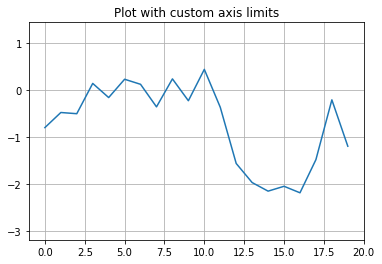

In [7]:
plt.plot(y.cumsum())
plt.grid(True)
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum()) - 1, 
         np.max(y.cumsum()) + 1)
plt.title('Plot with custom axis limits')

A plot usually contains a number of labels — e.g., a title and labels describing the nature of $x$ and $y$ values. These are added by the functions <code>plt.title</code>, <code>plt.xlabel</code>, and <code>plt.ylabel</code>, respectively. By default, <code>plot</code> plots continuous lines, even if discrete data points are provided. The plotting of discrete points is accomplished by choosing a different style option. 

Text(0.5,1,'A Simple Plot')

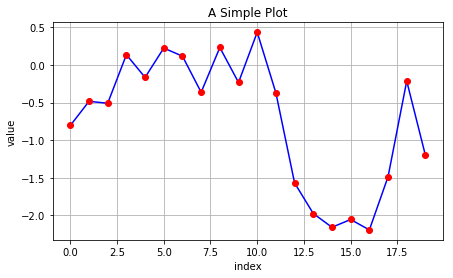

In [8]:
plt.figure(figsize=(7, 4))
 # the figsize parameter defines the
 # size of the figure in (width, height)
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

<code>plt.plot</code> supports the color abbreviations

<center>_Options for <code>plt.axis</code>_</center>

| Character   | Color        |
|:-----------:|-------------------|
| $b$ | Blue | 
| $g$ | Green |
| $r$ | Red |
| $c$ | Cyan |
| $y$ | Yellow |
| $k$ | Black |
| $w$ | White |

In terms of line and/or point styles, <code>plt.plot</code> supports the characters.

<center>_Options for <code>plt.axis</code>_</center>

| Character   | Symbol        |
|:-----------:|-------------------|
| $-$ | Solid line style | 
| $\_$ | Dashed line style |
| $-.$ | Dash-dot line style |
| $:$ | Dotted line style |
| $.$ | Point marker |
| $,$ | Pixel marker |
| $o$ | Circle marker |
| ... | ... |

_Data Visualization_ > _Two-Dimensional Plotting_
#### Two-Dimensional Data Set

Plotting one-dimensional data can be considered a special case. In general, data sets will consist of multiple separate subsets of data. The handling of such data sets follows the same rules with <code>matplotlib</code> as with one-dimensional data. 

However, a number of additional issues might arise in such a context. For example, 
- two data sets might have such a different scaling that they cannot be plotted using the same $y$- and/or $x$-axis scaling.
- you may want to visualize two different data sets in different ways, e.g., one by a line plot and the other by a bar plot.

In [9]:
np.random.seed(2000)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
y

array([[ 1.73673761,  1.89791391],
       [-0.37003581,  1.74900181],
       [ 0.21302575, -0.51023122],
       [ 0.35026529, -1.21144444],
       [-0.27051479, -1.6910642 ],
       [ 0.93922398, -2.76624806],
       [ 1.74614319, -3.05703153],
       [ 1.52519555, -3.22618757],
       [ 2.62602999, -3.14367705],
       [ 2.6216544 , -4.8662353 ],
       [ 3.67921082, -7.38414811],
       [ 1.7685707 , -6.07769276],
       [ 2.19296834, -6.54686084],
       [ 1.18689581, -7.46878388],
       [ 1.81330034, -7.11160718],
       [ 1.79458178, -6.89043591],
       [ 2.49318589, -6.05592589],
       [ 0.82754806, -8.95736573],
       [ 0.77890953, -9.00274406],
       [ 2.25424343, -9.51643749]])

You can also pass such two-dimensional arrays to <code>plt.plot</code>. It will then automatically interpret the contained data as separate data sets.

Text(0.5,1,'A Simple Plot')

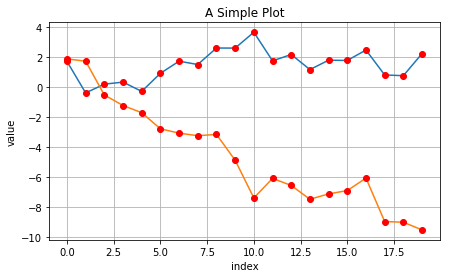

In [10]:
plt.figure(figsize=(7, 4))
plt.plot(y, lw=1.5) # plots two lines
plt.plot(y, 'ro')   # plots two dotted lines
plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

Further annotations might be helpful to better read the plot. You can add individual labels to each data set and have them listed in the legend. <code>plt.legend</code> accepts different locality parameters. 0 stands for _best location_, in the sense that as little data as possible is hidden by the legend.

Text(0.5,1,'A Simple Plot')

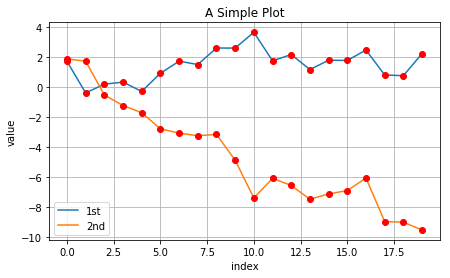

In [11]:
plt.figure(figsize=(7, 4))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

Multiple data sets with a similar scaling, like simulated paths for the same financial risk factor, can be plotted using a single $y$-axis. However, often data sets show rather different scalings and the plotting of such data with a single $y$ scale generally leads to a significant loss of visual information.

Text(0.5,1,'A Simple Plot')

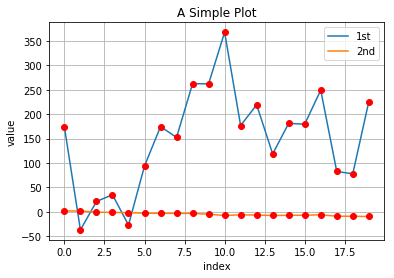

In [12]:
y[:, 0] = y[:, 0] * 100
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

The first data set is still “visually readable,” while the second data set now looks like a straight line with the new scaling of the $y$-axis. In a sense, information about the second data set now gets “visually lost.” There are two basic approaches to resolve this problem:
- Use of two $y$-axes (left/right)
- Use of two subplots (upper/lower, left/right)

The left $y$-axis is for the first data set while the right $y$-axis is for the second. Consequently, there are also two legends:

Text(0,0.5,'value 2nd')

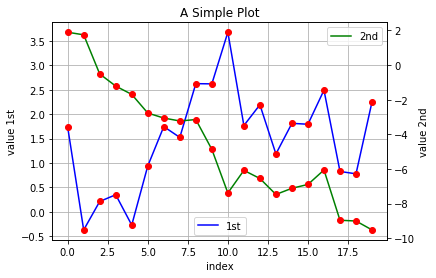

In [13]:
np.random.seed(2000)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
ax2 = ax1.twinx()
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')

By using the <code>plt.subplots</code> function, we get direct access to the underlying plotting objects (the figure, subplots, etc.). It allows us, for example, to generate a second subplot that shares the $x$-axis with the first subplot.

Consider the case of two separate subplots.

Text(0,0.5,'value')

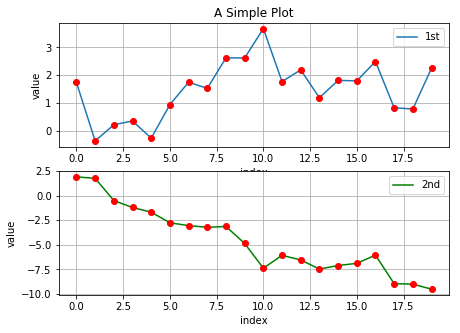

In [14]:
plt.figure(figsize=(7, 5))
plt.subplot(211)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(212)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')

The placing of subplots in the a <code>matplotlib</code> figure object is accomplished here by the use of a special coordinate system. <code>plt.subplot</code> takes as arguments three integers for <code>numrows</code>, <code>numcols</code>, and <code>fignum</code> (either separated by commas or not). <code>numrows</code> specifies the number of _rows_, <code>numcols</code> the number of _columns_, and <code>fignum</code> the number of the _sub-plot_, starting with 1 and ending with <code>numrows * numcols</code>.

It might be necessary or desired to choose two different plot types to visualize such data. With the subplot approach you have the freedom to combine arbitrary kinds of
plots that <code>matplotlib</code> offers.

Text(0.5,1,'2nd Data Set')

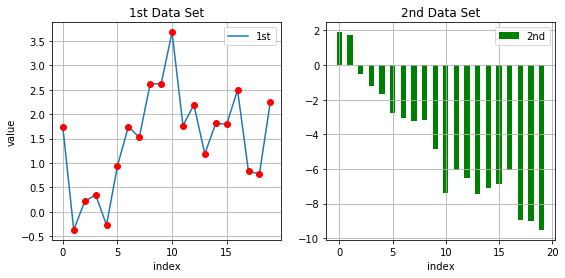

In [15]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')
plt.subplot(122)
plt.bar(np.arange(len(y)), y[:, 1], width=0.5, 
        color='g', label='2nd')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.title('2nd Data Set')

_Data Visualization_ > _Two-Dimensional Plotting_
#### Other Plot Styles

Line and point plots are probably the most important ones in finance; this is because many data sets embody time series data, which generally is visualized by such plots. We want to stick with the two-dimensional data set and illustrate some alternative, and for financial applications useful, visualization approaches.

The first is the _scatter plot_, where the values of one data set serve as the x values for the other data set. 

In [16]:
y = np.random.standard_normal((1000, 2))
y

array([[-0.66844251, -1.03332741],
       [ 2.5052391 ,  0.10662364],
       [ 0.36308511,  1.11232645],
       ..., 
       [-1.34258218,  1.08187594],
       [ 0.10244711,  0.95137972],
       [ 0.1702842 ,  0.8503732 ]])

Text(0.5,1,'Scatter Plot')

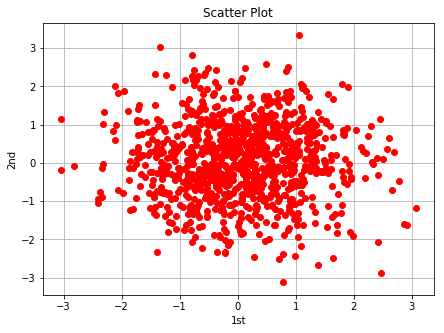

In [17]:
plt.figure(figsize=(7, 5))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

<code>matplotlib</code> also provides a specific function to generate scatter plots. It basically works in the same way, but provides some additional features.

Text(0.5,1,'Scatter Plot')

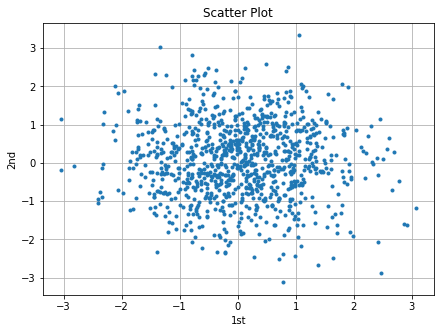

In [18]:
plt.figure(figsize=(7, 5))
plt.plot(y[:, 0], y[:, 1], '.')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

The <code>scatter</code> plotting function allows the addition of a third dimension, which can be visualized through different colors and be described by the use of a color bar.

In [19]:
c = np.random.randint(0, 10, len(y))
c

array([9, 9, 7, 5, 0, 1, 6, 2, 7, 6, 6, 2, 2, 7, 1, 2, 3, 7, 9, 5, 5, 7, 8,
       2, 2, 9, 1, 9, 9, 3, 3, 6, 1, 1, 6, 5, 0, 2, 7, 1, 5, 8, 9, 3, 4, 6,
       4, 9, 7, 6, 4, 0, 3, 1, 8, 5, 6, 2, 7, 4, 6, 9, 4, 1, 7, 0, 7, 3, 3,
       4, 9, 6, 0, 4, 1, 7, 7, 1, 5, 5, 0, 9, 2, 3, 2, 3, 7, 6, 8, 8, 9, 0,
       0, 9, 8, 0, 8, 1, 7, 5, 2, 6, 4, 2, 5, 7, 2, 8, 6, 2, 6, 6, 0, 1, 4,
       8, 2, 9, 7, 3, 1, 9, 7, 5, 6, 4, 5, 4, 7, 2, 1, 3, 2, 7, 2, 9, 2, 7,
       6, 7, 9, 9, 0, 8, 1, 5, 1, 3, 8, 5, 7, 3, 2, 4, 0, 6, 6, 0, 0, 8, 1,
       4, 1, 4, 0, 8, 1, 2, 4, 4, 5, 5, 6, 3, 1, 5, 5, 1, 0, 7, 7, 0, 8, 6,
       5, 5, 3, 7, 2, 3, 7, 1, 7, 0, 8, 1, 2, 4, 8, 1, 6, 5, 6, 9, 7, 7, 3,
       7, 8, 3, 9, 8, 3, 5, 2, 4, 2, 3, 6, 5, 4, 3, 8, 7, 1, 0, 3, 3, 7, 3,
       0, 9, 4, 0, 0, 6, 3, 7, 4, 8, 2, 6, 5, 5, 4, 2, 6, 5, 3, 4, 2, 9, 0,
       3, 5, 1, 5, 5, 7, 6, 7, 5, 1, 3, 2, 6, 2, 9, 8, 6, 9, 2, 5, 1, 2, 7,
       8, 2, 6, 2, 5, 9, 4, 8, 2, 8, 7, 2, 7, 1, 7, 9, 1, 8, 8, 8, 5, 0, 7,
       9, 0,

Text(0.5,1,'Scatter Plot')

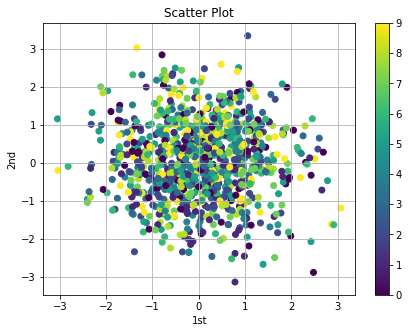

In [20]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1], c=c, marker='o')
plt.colorbar()
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

Another type of plot, the <code>histogram</code>, is also often used in the context of financial returns.

Text(0.5,1,'Histogram')

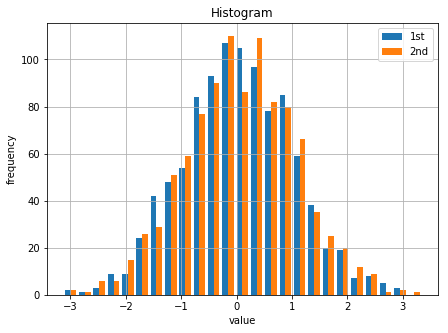

In [21]:
plt.figure(figsize=(7, 5))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

```python
plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=‘bar’, align=‘mid’, orientation=‘vertical’, rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)
```

The data of the two data sets is stacked in the histogram:

Text(0.5,1,'Histogram')

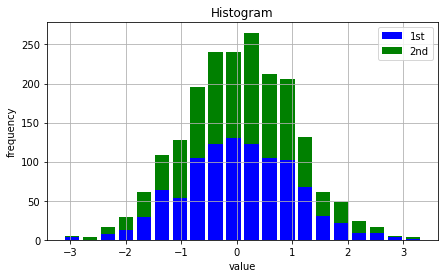

In [22]:
plt.figure(figsize=(7, 4))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'], 
         rwidth=0.8, stacked=True, bins=20)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

Another useful plot type is the <code>boxplot</code>. Similar to the histogram, the boxplot allows both a concise overview of the characteristics of a data set and easy comparison of multiple data sets.

Text(0.5,1,'Boxplot')

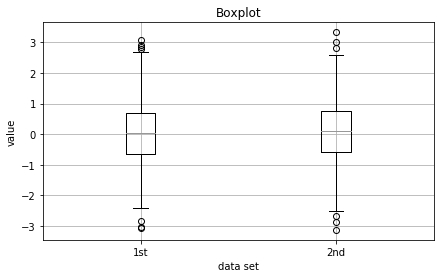

In [23]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.boxplot(y)
plt.grid(True)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

<code>matplotlib</code> seamlessly handles LaTeX type setting for the inclusion of mathematical formulae into plots:

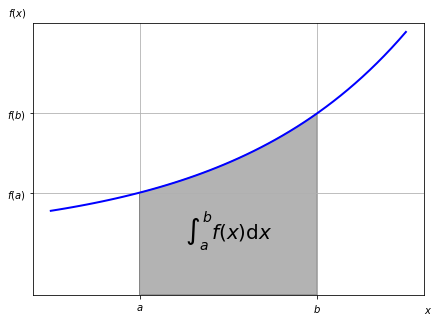

In [24]:
from matplotlib.patches import Polygon 

def func(x):
    return 0.5 * np.exp(x) + 1

a, b = 0.5, 1.5 # integral limits 
x = np.linspace(0, 2)
y = func(x)

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# Illustrate the integral value, i.e. the area under the function 
# between the lower and upper limits
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
            
plt.text(0.5 * (a + b), 1, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
    
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))
plt.grid(True)

_Data Visualization_ > 
### Financial Plots

<code>matplotlib</code> also provides a small selection of special finance plots. These, like the <code>candlestick</code> plot, are mainly used to visualize historical stock price data or similar financial time series data. Those plotting capabilities are found in the <code>matplotlib.finance</code> sublibrary:

```Python
pip install pandas_datareader
```

In [25]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
apple = pdr.get_data_yahoo("AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 downloaded


In [26]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,113.847588,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,113.720161,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,114.298462,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,115.572708,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,116.631294,33561900
2017-01-10,118.769997,119.379997,118.300003,119.110001,116.748909,24462100
2017-01-11,118.739998,119.930000,118.599998,119.750000,117.376228,27588600
2017-01-12,118.900002,119.300003,118.209999,119.250000,116.886131,27086200
2017-01-13,119.110001,119.620003,118.809998,119.040001,116.680298,26111900


In [27]:
apple?

```python
# import pandas as pd
# import pandas.io.data as web
import pandas_datareader.data as web 
# Package and modules for importing data; this code may change depending on pandas version
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2017,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, 
# second is the source ("yahoo" for Yahoo! Finance), 
# third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
```

> <center>**DATA QUALITY OF WEB SOURCES**</center>

> Nowadays, a couple of Python libraries provide convenience functions to retrieve data from Yahoo! Finance. Be aware that, although this is a convenient way to visualize financial data sets, the data quality is not sufficient to base any important investment decision on it. For example, stock splits, leading to “price drops,” are often not correctly accounted for in the data provided by Yahoo! Finance. This holds true for a number of other freely available data sources as well.

<code>apple</code> now contains time series data for the _AAPL_ starting with Date (in epoch time format), then Open, High, Low, Close, and Volume:

In [28]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,113.847588,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,113.720161,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,114.298462,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,115.572708,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,116.631294,33561900


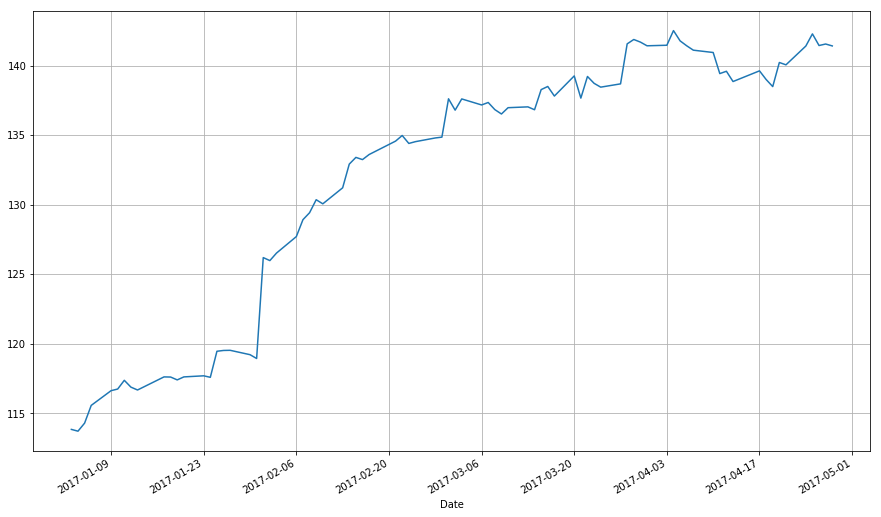

In [29]:
# Control the default size of figures in this Jupyter notebook

fig, ax = plt.subplots(figsize=(15, 9))
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

AttributeError: module 'pandas_datareader.data' has no attribute 'Timedelta'

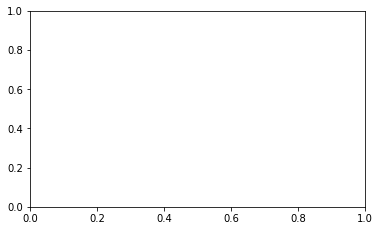

In [32]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import date2num
import time
import datetime

def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    
    """
    :param dat: pandas DataFrame object with datetime64 index, 
                and float columns "Open", "High", "Low", and "Close", 
                likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered 
                  by a single candlestick. Valid string inputs include "day", 
                  "week", "month", and "year", ("day" default), 
                  and any numeric input indicates the number of trading days 
                  included in a period
    :param otherseries: An iterable that will be coerced into a list, 
                        containing the columns of dat that hold other series 
                        to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, 
    also plotting other series if passed.
    """
    
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) 
                  # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) 
                  # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) 
                  # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) 
              # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) 
              # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) 
          # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pdr.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), 
                                  plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
    return
 
pandas_candlestick_ohlc(apple)

_Data Visualization_ >
### 3D Plotting

One application area is volatility surfaces showing implied volatilities simultaneously for a number of times-of-maturity and strikes. we consider:
- _Strike values_ between 50 and 150 
- _Times-to-maturity_ between 0.5 and 2.5 years

In [33]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)

In [34]:
strike[:2]

array([[  50.        ,   54.34782609,   58.69565217,   63.04347826,
          67.39130435,   71.73913043,   76.08695652,   80.43478261,
          84.7826087 ,   89.13043478,   93.47826087,   97.82608696,
         102.17391304,  106.52173913,  110.86956522,  115.2173913 ,
         119.56521739,  123.91304348,  128.26086957,  132.60869565,
         136.95652174,  141.30434783,  145.65217391,  150.        ],
       [  50.        ,   54.34782609,   58.69565217,   63.04347826,
          67.39130435,   71.73913043,   76.08695652,   80.43478261,
          84.7826087 ,   89.13043478,   93.47826087,   97.82608696,
         102.17391304,  106.52173913,  110.86956522,  115.2173913 ,
         119.56521739,  123.91304348,  128.26086957,  132.60869565,
         136.95652174,  141.30434783,  145.65217391,  150.        ]])

We generate the _fake implied volatilities_ by a simple, scaled quadratic function:

In [35]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm 
  # generate fake implied volatilities

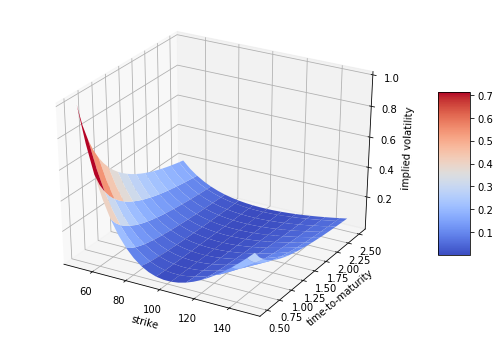

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, 
                       cmap=plt.cm.coolwarm, linewidth=0.5, 
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)

The line style can be replaced by single points or, as in what follows, single triangles.

Text(0.5,0,'implied volatility')

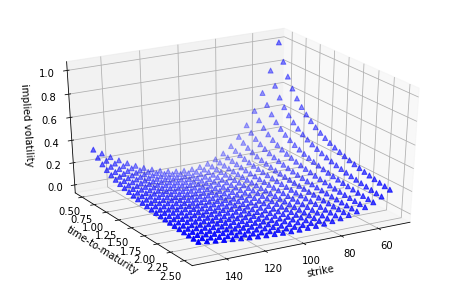

In [37]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)

ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')